# Проверка гипотез для увеличения выручки интернет-магазина

**Оглавление**

* [Информация о проекте](#Информация-о-проекте)
    * [Бизнес-задача](#Бизнес-задача)
    * [План выполнения проекта](#План-выполнения-проекта)
    * [Описание данных](#Описание-данных)
* [Подготовка проекта к анализу](#Подготовка-проекта-к-анализу)
* [Приоритизация гипотез](#Приоритизация-гипотез)
    * [Расчёт ICE / RICE показателей для гипотез](#Расчёт-ICE-/-RICE-показателей-для-гипотез)
    * [Анализ приоритизации по фреймворкам ICE и RICE](#Анализ-приоритизации-по-фреймворкам-ICE-и-RICE)
* [Анализ A/B-теста](#Анализ-A/B-теста)
    * [Проверка и подготовка данных](#Проверка-и-подготовка-данных)
    * [Анализ результатов A/B-теста](#Анализ-результатов-A/B-теста)
    * [Итоги анализа A/B-теста](#Итоги-анализа-A/B-теста)
* [Общий вывод](#Общий-вывод)

## Информация о проекте

### Бизнес-задача
Подготовить план действий по удержанию клиентов

Совместно с отделом маркетинга подготовлены 9 гипотез для увеличения выручки. Необходимо провести их приоритизацию, после чего провести A/B тест и проанализировать результаты.


### Исследовательские задачи

**Первая часть**.
* Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
* Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
* Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

============================================================================================================================

**Вторая часть**.
Проанализировать A/B-тест:

*    Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
*    Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
*    Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
*    Построить график кумулятивной конверсии по группам. Сделать выводы и предположения.
*    Построить график относительного изменения кумулятивной конверсии группы B к группе A. Сделать выводы и предположения.
*    Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
*    Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
*    Построить точечный график стоимостей заказов. Сделать выводы и предположения.
*    Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
*    Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным. Сделать выводы и предположения.
*    Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
*    Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделать выводы и предположения.
*    Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
*    Принять решение по результатам теста и объяснить его. Варианты решений: 
        - Остановить тест, зафиксировать победу одной из групп. 
        - Остановить тест, зафиксировать отсутствие различий между группами. 
        - Продолжить тест.

### Описание данных

Данные для **первой части**:

Файл `hypothesis.csv` (информация о гипотезах)

* `Hypothesis` — краткое описание гипотезы;
* `Reach` — охват пользователей по 10-балльной шкале;
* `Impact` — влияние на пользователей по 10-балльной шкале;
* `Confidence` — уверенность в гипотезе по 10-балльной шкале;
* `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

============================================================================================================================

Данные для **второй части**:

Файл `orders.csv` (информация о заказах)

* `transactionId` — идентификатор заказа;
* `visitorId` — идентификатор пользователя, совершившего заказ;
* `date` — дата, когда был совершён заказ;
* `revenue` — выручка заказа;
* `group` — группа A/B-теста, в которую попал заказ.

Файл `visitors.csv` (информация о посетителях)

* `date` — дата;
* `group` — группа A/B-теста;
* `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

## Подготовка проекта к анализу

Подключим необходимые библиотеки и откроем файлы с данными.

In [1]:
# подключаем необходимые библиотеки
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()
import scipy.stats as stats

In [2]:
hypothesis = pd.read_csv(input('Введите путь к файлу: '))
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


<div class="alert alert-info"> <b>Комментарий студента:</b> Готово - решил в эксепт сделать пользовательский инпут, не люблю явно прописывать локальные пути :)</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера: вторая итерация ревью <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Да, так тоже можно, даже более оптимальный вариант:)

In [3]:
try:
    orders = pd.read_csv('/datasets/orders.csv')
except:
    path = input('Введите путь к файлу: ')
    orders = pd.read_csv(path)
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [4]:
try:
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    path = input('Введите путь к файлу: ')
    visitors = pd.read_csv(path)
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Файлы с данными загружены и готовы к работе.

Таблица, необходимая для выполнения первой части проекта, не нуждается в дополнительной проверке или предобработке, поэтому выполним задачи первой части, отложив проверку данных для второй.

## Приоритизация гипотез

### Расчёт ICE / RICE показателей для гипотез

Для начала рассчитаем показатель ICE. Напомним, что ICE рассчитывается по следующей формуле:

$$ICE = \frac{Impact * Confidence}{Efforts}$$

In [5]:
pd.set_option("max_colwidth", max(hypothesis['Hypothesis'].apply(len))+1)

hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis = hypothesis.sort_values(by='ICE', ascending=False)
hypothesis.style.background_gradient(cmap ='coolwarm')

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1


Дополнительно рассчитаем для каждой гипотезы показатель RICE, его формула следующая:


$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$

In [6]:
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis = hypothesis.sort_values(by='RICE', ascending=False)
hypothesis.style.background_gradient(cmap ='coolwarm')

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2,112
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7,56
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3333,40
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8,40
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125,9
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2,4
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33333,4
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1,3


Добавим ранги для каждой гипотезы и посмотрим на их изменение.

In [7]:
hypothesis['ICE_rank'] = hypothesis['ICE'].rank(ascending=False)
hypothesis['RICE_rank'] = hypothesis['RICE'].rank(method='first', ascending=False)
hypothesis['delta'] = hypothesis['ICE_rank'] - hypothesis['RICE_rank']
hypothesis.style.background_gradient(cmap ='coolwarm')

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE,ICE_rank,RICE_rank,delta
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2,112,3,1,2
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7,56,5,2,3
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3333,40,2,3,-1
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8,40,4,4,0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2,16.2,1,5,-4
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125,9,8,6,2
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2,4,6,7,-1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33333,4,7,8,-1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1,3,9,9,0


### Анализ приоритизации по фреймворкам ICE и RICE

При оценке гипотез по фреймворку **ICE**, топ-3 гипотез, направленных на увеличение выручки интернет-магазина, следующие:

<ol>
<li>Запустить акцию, дающую скидку на товар в день рождения;

<li>Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;

<li>Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.
</ol>
<br>
При оценке приоритетов методом <b>RICE</b> картина меняется, топ-3 выглядит следующим образом:

<ol>
<li>Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;

<li>Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;

<li>Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.
</ol>
<br>
Причина, по которой рейтинг гипотез меняется, заключается во влиянии показателя охвата. Нетрудно заметить, что из топа исчезла гипотеза об увеличении прибыли за счёт акции, дающей скидку в день рождения - её охват минимальный.

С другой стороны, сравнимая с ней по показателям `Impact`, `Confidence` и `Efforts` гипотеза об увеличении выручки за счёт составления базы клиентов для email-рассылок путём добавления формы подписки на все основные страницы обладает максимальным показателем `Reach`, что и позволяет ей - довольно уверенно! - захватить лидерство.

И, конечно, не стоит отказываться от новых каналов привлечения трафика - эта гипотеза стабильно вошла в топ-3 при рассчёте индекса по обоим фреймворкам.

## Анализ A/B-теста

### Проверка и подготовка данных

На втором шаге проекта мы загрузили данные, необходимые для анализа - но отложили их проверку до окончания первой части. Вернёмся к ней - проверим типы данных, наличие дубликатов и пропусков в предоставленных файлах.

In [8]:
print('Проверка данных на дубликаты:')
print(f"\tВ таблице с заказами обнаружено {orders.duplicated().sum()} дубликатов")
print(f"\tВ таблице с посетителями обнаружено {visitors.duplicated().sum()} дубликатов")

Проверка данных на дубликаты:
	В таблице с заказами обнаружено 0 дубликатов
	В таблице с посетителями обнаружено 0 дубликатов


In [9]:
display(orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

In [10]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [11]:
display(visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

In [12]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

Дополнительно выполним проверку групп на пересекающихся пользователей.

In [13]:
len(orders.groupby('visitorId').agg({'group':'nunique'}).reset_index().query('group > 1'))

58

In [14]:
users_to_clean = orders.groupby('visitorId').agg({'group':'nunique'}).reset_index().query('group > 1')['visitorId']

In [15]:
print('Всего заказов от проблемных покупателей:', len(orders[orders['visitorId'].isin(users_to_clean)]))
print('Доля заказов от проблемных покупателей:', len(orders[orders['visitorId'].isin(users_to_clean)])/len(orders))

Всего заказов от проблемных покупателей: 181
Доля заказов от проблемных покупателей: 0.15121136173767752


58 пользователей попали и в группу A, и в группу B - в общей сложности они совершили 181 заказ - 15% от общего числа заказов. Это неприятно: потери в 15% - довольно значительные для того, чтобы просто вычистить информацию об этих покупках, с другой стороны, пересечение групп сильно влияет на результаты теста.

Удалим записи о таких заказах.
Таблицу с числом визитов изменять не будем - в нашем распоряжении нет "сырых" данных о пользовательских визитах.

In [16]:
orders = orders[~orders['visitorId'].isin(users_to_clean)]

В предоставленных для анализа данных не обнаружено ни дубликатов, ни пропусков, однако нашли пересекающихся пользователей в контрольной и тестовой группах - исключили из анализа данные о заказах этих пользователей.

В обоих датафреймах привели дату к более удобному для работы формату.

Прежде чем приступить к анализу, подготовим несколько агрегированных таблиц.

In [17]:
# пересекаем группы и даты заказов
datesGroups = orders[['date', 'group']].drop_duplicates()

In [18]:
# агрегируем данные о заказах
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

In [19]:
# агрегируем данные о посетителях
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

In [20]:
# считаем кумулятивные данные и задаём названия столбцов в датафрейме cumulativeData
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

In [21]:
# считаем кумулятивную выручку в группах A и B
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

In [22]:
# объединяем данные о кумулятивной выручке
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, how='outer', on='date', suffixes=['A', 'B'])

In [23]:
# считаем конверсию на кумулятивных данных
cumulativeData['conversion'] = (
    cumulativeData['orders'] / cumulativeData['visitors']
)

In [24]:
# разделяем данные о кумулятивной конверсии по подгруппам
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

In [25]:
# приводим кумулятивную конверсию к удобному для анализу виду
mergedCumulativeConversions = cumulativeDataA[['date','conversion']] \
    .merge(cumulativeDataB[['date','conversion']], how='outer', on='date', suffixes=['A','B'])

In [26]:
# считаем количество заказов на пользователя и задаём названия столбцов в получившемся датафрейме
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsers.columns = ['userId', 'orders']

In [27]:
# считаем количество посетителей в группе A в день
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

In [28]:
# считаем кумулятивное число посетителей в группе A по дням
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

In [29]:
# считаем количество посетителей в группе B в день
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

In [30]:
# считаем кумулятивное число посетителей в группе B по дням
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [31]:
# считаем количество заказов в группе A в день
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

In [32]:
# считаем кумулятивное число заказов в группе A по дням
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

In [33]:
# считаем количество заказов в группе B в день
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

In [34]:
# считаем кумулятивное число заказов в группе B по дням
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

In [35]:
# считаем количество заказов на пользователя в группе A
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

In [36]:
# считаем количество заказов на пользователя в группе B
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

In [37]:
# собираем общую таблицу с агрегированными данными
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

In [38]:
# объявим переменные sampleA и sampleB, в которых пользователям с заказами будет 
# соответствовать число заказов пользователя, а пользователям без заказов — нули.

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(
    0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(
    0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

**Итог:**

В предоставленных для анализа данных не обнаружено ни дубликатов, ни пропусков. Приведение данных к нужному типу выполнено.

Промежуточные таблицы для анализа созданы - можно приступать непосредственно к анализу результатов A/B-теста.

### Анализ результатов A/B-теста

В данном разделе нам предстоит решить множество задач - будем выполнять их последовательно.

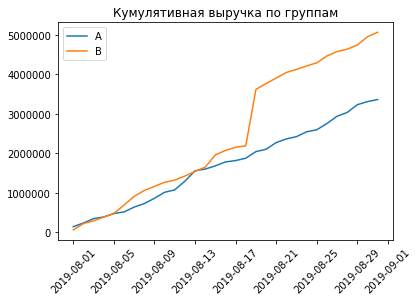

In [39]:
# построим график кумулятивной выручки по группам

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Кумулятивная выручка по группам')
plt.xticks(rotation=45)
plt.legend()
plt.show()

**Выводы и предположения:**
* Кумулятивная выручка в тестовой группе показывает резкий скачок между 18 и 19 августа.
* В дальнейшем тренда не меняется, и кумулятивная выручка растёт в обеих группах.
* Такое поведение может быть обусловлено выбросом - либо слишком крупной покупкой, либо всплеском в числе покупок.

Продолжим анализ.

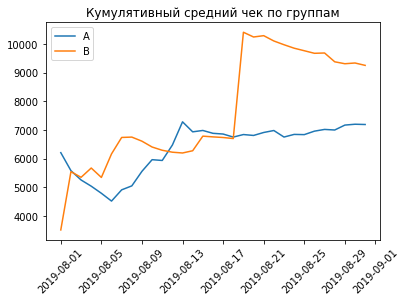

In [40]:
# построим график кумулятивного среднего чека по группам

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Кумулятивный средний чек по группам')
plt.xticks(rotation=45)
plt.legend() 
plt.show()

**Выводы и предположения:**
* Кумулятивный средний чек варьируется в период до 18 августа, после чего выходит на (относительное) плато.
* Кумулятивный средний чек в тестовой группе резко вырастает 18 августа.
* Гипотеза о наличии выброса в тестовой группе получает дополнительное эмпирическое подтверждение.

Продолжим анализ.

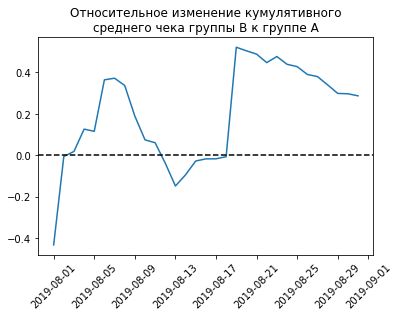

In [41]:
# построим график относительного изменения кумулятивного среднего чека группы B к группе A

plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']
          /mergedCumulativeRevenue['ordersB'])
         /(mergedCumulativeRevenue['revenueA']
           /mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('Относительное изменение кумулятивного\nсреднего чека группы B к группе A')
plt.xticks(rotation=45)
plt.show()

**Выводы и предположения:**
* Кумулятивный средний чек снова подсвечивает проблему, наблюдаемую на предыдущих графиках - резкое изменение 18 августа.
* Добавляем ещё одно эмпирическое свидетельство к предположению о наличии выброса в группе B.

Продолжим анализ.

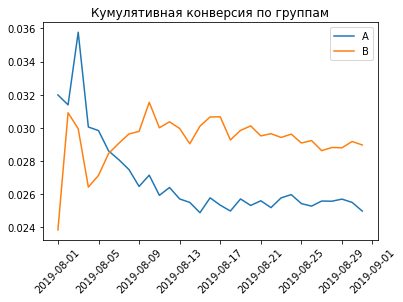

In [42]:
# построим график кумулятивной конверсии по группам

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('Кумулятивная конверсия по группам')
plt.legend()
plt.xticks(rotation=45)
plt.show()

**Выводы и предположения:**
* После колебания первых нескольких дней теста, конверсия в группе B стабильно выше, чем в группе A.
* В отличие от предыдущих показателей, график кумулятивной конверсии не отражает влияния выбросов 18 августа.
* Вероятно, что выброс, заметный на предыдущих графиках, скорее обусловлен стоимостью отдельной покупки.

Продолжим анализ.

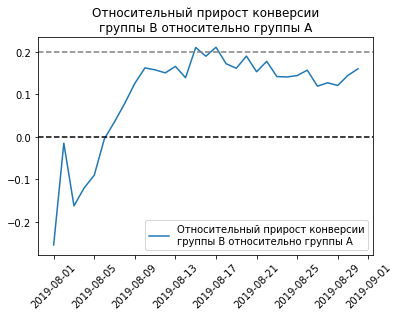

In [43]:
# построим график относительного изменения кумулятивной конверсии группы B к группе A

plt.plot(cumulativeData['date'].unique(), cumulativeDataB.reset_index()['conversion']/cumulativeDataA.reset_index()['conversion']-1, label='Относительный прирост конверсии\nгруппы B относительно группы A')
plt.axhline(y=0, color='black', linestyle='--') 
plt.axhline(y=0.2, color='grey', linestyle='--') 
plt.title('Относительный прирост конверсии\nгруппы B относительно группы A')
plt.legend()
plt.xticks(rotation=45)
plt.show()

**Выводы и предположения:**
* В первые дни теста конверсия в группе B была ниже, чем в контрольной, однако уже со второй недели стала её превышать и к концу месяца стаблизировалась на уровне ~115-118% от конверсии контрольной.

Продолжим анализ.

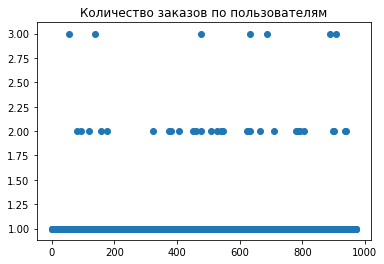

In [44]:
# построим точечный график количества заказов по пользователям

x_values = pd.Series(range(0, len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Количество заказов по пользователям')
plt.show()

**Выводы и предположения:**
* Подавляющее большинство пользователей совершило 1 или 2 заказа.
* Явных выбросов нет - есть группа пользователей, совершивших 3 заказа, однако маловероятно, что на метрики влияют именно они.

Продолжим анализ: посчитаем 95-й и 99-й процентили количества заказов на пользователя, выберем границу для определения аномальных пользователей.

In [45]:
# считаем процентили

print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[1. 2.]


95% пользователей совершили не более одной покупки, 99% - не более 2-х.

Остановимся на границе в 2 заказа - исходя из предшествующего анализа, ключевое влияние оказывает скорее стоимость конкретного заказа, чем число заказов на одного пользователя. 

Проверим это на следующих шагах.

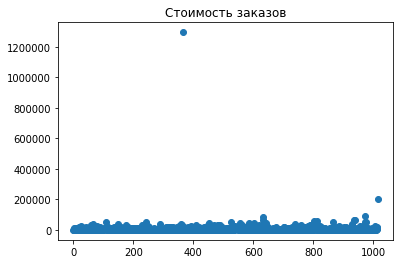

In [46]:
# построим точечный график стоимостей заказов

x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Стоимость заказов')
plt.show()

**Выводы и предположения:**
* Выброс, влиявший на данные, найден - мы обнаружили заказ, стоимость которого превосходит стоимость любого другого заказа кратно.
* Предположительно, удаление этого заказа из базы позволит проанализировать результаты теста точнее.

Продолжим анализ: посчитаем 95-й и 99-й процентили стоимости заказов, выберем границу для определения аномальной стоимости.

In [47]:
# считаем процентили

print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


95% заказов ограничены стоимостью в 26 785 рублей, 99% - дешевле 53 904 рублей.

Основной фокус нашего внимания - это выручка, таким образом имеет смысл выбрать более строгий критерий для отсечения выбросов по показателю стоимости заказов.

Ограничим стоимость границей в 26 785 руб. и продолжим анализ - нам предстоит рассчитать статистическую значимость на "сырых" и на очищенных данных, после чего принять решение по результатам теста.

In [48]:
# посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным

print('Вводные:\n\tH0: В конверсии между группами отличий нет\n\tH1: В конверсии между группами есть отличия\n\ta: 0.05\n')
print('Результаты:\n\tp-value:', '{0:.5f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('\tОтносительное различие:', "{0:.3f}\n".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))
if stats.mannwhitneyu(sampleA, sampleB)[1] < 0.05:
    print('Отвергаем H0 - различия есть.')
else:
    print('Недостаточно оснований для того, чтобы отвергнуть H0.')

Вводные:
	H0: В конверсии между группами отличий нет
	H1: В конверсии между группами есть отличия
	a: 0.05

Результаты:
	p-value: 0.00551
	Относительное различие: 0.160

Отвергаем H0 - различия есть.


**Выводы и предположения:**
* На сырых данных отличия в конверсии есть - относительное различие составляет около 16% - неплохой результат
* Однако не забываем, что нам предстоит выполнить очистку данных перед принятием итогового решения.

Продолжим анализ.

In [49]:
# посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

print('Вводные:\n\tH0: В среднем чеке между группами отличий нет\n\tH1: В среднем чеке между группами есть отличия\n\ta: 0.05\n')
print('Результаты:\n\tp-value:', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('\tОтносительное различие:', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))
if stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1] < 0.05:
    print('Отвергаем H0 - различия есть.')
else:
    print('Недостаточно оснований для того, чтобы отвергнуть H0.')

Вводные:
	H0: В среднем чеке между группами отличий нет
	H1: В среднем чеке между группами есть отличия
	a: 0.05

Результаты:
	p-value: 0.415
	Относительное различие: 0.287
Недостаточно оснований для того, чтобы отвергнуть H0.


**Выводы и предположения:**
* Теста Манна-Уитини говорит, что мы не можем отвергнуть нулевую гипотезу, следовательно между группами нет отличий.
* Тем не менее, именно на средний чек очистка данных от выбросов должна повлиять в первую очередь.

Продолжим анализ. Нам осталось очистить данные, повторить расчёт значимых отличий и принять итоговое решение.

Напомним, что количество заказов на пользователя ограничим уровнем "не более двух", а стоимость заказа - "не более 26 785".

In [50]:
# подготовим "фильтрующие" наборы данных

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 26785]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [51]:
# подготовим отфильтрованные наборы данных

sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [52]:
# посчитаем статистическую значимость различий в конверсии между группами по очищенным данным

print('Вводные:\n\tH0: В конверсии между группами отличий нет\n\tH1: В конверсии между группами есть отличия\n\ta: 0.05\n')
print('Результаты:\n\tp-value:', '{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('\tОтносительное различие:', "{0:.3f}\n".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))
if stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1] < 0.05:
    print('Отвергаем H0 - различия есть.')
else:
    print('Недостаточно оснований для того, чтобы отвергнуть H0.')

Вводные:
	H0: В конверсии между группами отличий нет
	H1: В конверсии между группами есть отличия
	a: 0.05

Результаты:
	p-value: 0.00618
	Относительное различие: 0.182

Отвергаем H0 - различия есть.


**Выводы и предположения:**
* После чистки данных основной вывод относительно конверсии в группах A и B не изменился - различия есть.

Продолжим анализ. Что произошло со средним чеком после очистки?

In [53]:
# посчитаем статистическую значимость различий в среднем чеке заказа между группами по очищенным данным

print('Вводные:\n\tH0: В среднем чеке между группами отличий нет\n\tH1: В среднем чеке между группами есть отличия\n\ta: 0.05\n')
print('Результаты:\n\tp-value:', 
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('\tОтносительное различие:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)
if stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1] < 0.05:
    print('Отвергаем H0 - различия есть.')
else:
    print('Недостаточно оснований для того, чтобы отвергнуть H0.')

Вводные:
	H0: В среднем чеке между группами отличий нет
	H1: В среднем чеке между группами есть отличия
	a: 0.05

Результаты:
	p-value: 0.323
	Относительное различие: -0.048
Недостаточно оснований для того, чтобы отвергнуть H0.


**Выводы и предположения:**
* Хотя средний чек и претерпел серьёзные изменения после очистки, на результаты статистического теста это не повлияло - в среднем чеке между группами отличий нет.

Анализ завершён.

### Итоги анализа A/B-теста

* Обнаружены значимые отличия **в конверсии** между тестовой и контрольной группами - конверсия в тестовой группе значимо выше.
* Значимых отличий **в среднем чеке** между группами после очистки данных не обнаружено.
* Реомендуем **остановить тест и зафиксировать победу группы B** - показатели среднего чека и конверсии в целом стабилизировались, ожидать дальнейших кардинальных изменений в показателях не стоит.

## Общий вывод

Проект состоял из двух частей: оценки гипотез и анализа результатов A/B-теста.

В первой части рекомендовано остановить выбор на следующих гипотезах - обе показывают сильные результаты при расчётах приоритета по методам ICE и RICE:
* Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
* Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.

Во второй части рекомендовано зафиксировать победу группы B, так как в этой группе наблюдается значимо более высокая конверсия, чем в группе A, и показатели в группах в целом стабилизировались. Отдельно отметим, что в ходе эксперимента не зафиксировано значимых отличий между группами в среднем чеке.